In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

In [4]:
train_path = 'D:\\chest_xray\\train'
valid_path = 'D:\\chest_xray\\test'

In [5]:
xcept = Xception(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [6]:
for layer in xcept.layers:
  layer.trainable = False

In [7]:
folders = glob('D:\\chest_xray\\train/*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(xcept.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)

In [9]:
model = Model(inputs=xcept.input, outputs=prediction)

In [10]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=80,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/80
163/163 [==============================] - 343s 2s/step - loss: 0.7535 - accuracy: 0.9201 - val_loss: 2.6882 - val_accuracy: 0.7981
Epoch 2/80
163/163 [==============================] - 331s 2s/step - loss: 0.6392 - accuracy: 0.9354 - val_loss: 1.2697 - val_accuracy: 0.8830
Epoch 3/80
163/163 [==============================] - 329s 2s/step - loss: 0.5223 - accuracy: 0.9457 - val_loss: 1.6245 - val_accuracy: 0.8910
Epoch 4/80
163/163 [==============================] - 330s 2s/step - loss: 0.5209 - accuracy: 0.9486 - val_loss: 1.0139 - val_accuracy: 0.9022
Epoch 5/80
163/163 [==============================] - 332s 2s/step - loss: 0.6319 - accuracy: 0.9494 - val_loss: 1.5067 - val_accuracy: 0.8862
Epoch 6/80
163/163 [==============================] - 331s 2s/step - loss: 0.4817 - accuracy: 0.9574 - val_loss: 2.3161 - val_accuracy: 0.8718
Epoch 7/80
163/163 [==============================] - 330s 2s/step - loss: 0.3977 - accuracy: 0.9622 - val_loss: 1.6676 - val_accuracy: 0.8702

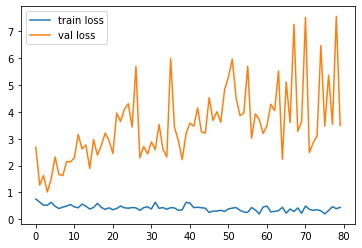

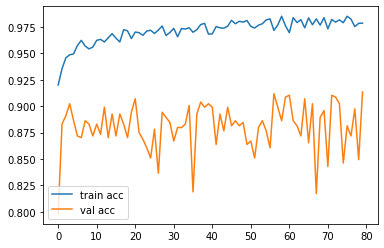

<Figure size 432x288 with 0 Axes>

In [15]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')